# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[800, 500, 200, 80]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 200
MOMENTUM = 0.85


In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

        
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 800)               2458400   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 500)               400500    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 200)               100200    
_________________________________________________________________
hidden_layer4 (Dense)        (None, 80)                16080     
_________________________________________________________________
output (Dense)               (None, 10)                810       
Total params: 2,975,990
Trainable params: 2,975,990
Non-trainable params: 0
___________________

50000/50000 [==============================] - 18s 366us/step - loss: 0.8886 - accuracy: 0.6809 - val_loss: 1.7293 - val_accuracy: 0.4971
Epoch 48/50
50000/50000 [==============================] - 19s 382us/step - loss: 0.8724 - accuracy: 0.6855 - val_loss: 1.7596 - val_accuracy: 0.4979
Epoch 49/50
50000/50000 [==============================] - 19s 375us/step - loss: 0.8717 - accuracy: 0.6884 - val_loss: 1.7680 - val_accuracy: 0.4904
Epoch 50/50
50000/50000 [==============================] - 19s 379us/step - loss: 0.8619 - accuracy: 0.6904 - val_loss: 1.8273 - val_accuracy: 0.4843
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 800)               2458400   
___________________________________

50000/50000 [==============================] - 19s 383us/step - loss: 0.4023 - accuracy: 0.8574 - val_loss: 1.9070 - val_accuracy: 0.5433
Epoch 44/50
50000/50000 [==============================] - 19s 377us/step - loss: 0.4013 - accuracy: 0.8563 - val_loss: 1.9642 - val_accuracy: 0.5294
Epoch 45/50
50000/50000 [==============================] - 19s 370us/step - loss: 0.3677 - accuracy: 0.8701 - val_loss: 1.9355 - val_accuracy: 0.5330
Epoch 46/50
50000/50000 [==============================] - 21s 416us/step - loss: 0.3556 - accuracy: 0.8737 - val_loss: 1.9641 - val_accuracy: 0.5395
Epoch 47/50
50000/50000 [==============================] - 21s 413us/step - loss: 0.3279 - accuracy: 0.8836 - val_loss: 2.1730 - val_accuracy: 0.5349
Epoch 48/50
50000/50000 [==============================] - 21s 419us/step - loss: 0.3182 - accuracy: 0.8866 - val_loss: 2.1137 - val_accuracy: 0.5417
Epoch 49/50
50000/50000 [==============================] - 20s 405us/step - loss: 0.3241 - accuracy: 0.8842 - va

50000/50000 [==============================] - 18s 368us/step - loss: 1.1892 - accuracy: 0.5812 - val_loss: 1.3434 - val_accuracy: 0.5249
Epoch 40/50
50000/50000 [==============================] - 18s 368us/step - loss: 1.1768 - accuracy: 0.5859 - val_loss: 1.3415 - val_accuracy: 0.5268
Epoch 41/50
50000/50000 [==============================] - 18s 365us/step - loss: 1.1686 - accuracy: 0.5884 - val_loss: 1.3277 - val_accuracy: 0.5329
Epoch 42/50
50000/50000 [==============================] - 18s 368us/step - loss: 1.1598 - accuracy: 0.5903 - val_loss: 1.3461 - val_accuracy: 0.5225
Epoch 43/50
50000/50000 [==============================] - 18s 367us/step - loss: 1.1482 - accuracy: 0.5947 - val_loss: 1.3722 - val_accuracy: 0.5160
Epoch 44/50
50000/50000 [==============================] - 18s 370us/step - loss: 1.1384 - accuracy: 0.5984 - val_loss: 1.3633 - val_accuracy: 0.5290
Epoch 45/50
50000/50000 [==============================] - 18s 367us/step - loss: 1.1310 - accuracy: 0.6013 - va

50000/50000 [==============================] - 17s 338us/step - loss: 1.7477 - accuracy: 0.3893 - val_loss: 1.7500 - val_accuracy: 0.3877
Epoch 36/50
50000/50000 [==============================] - 17s 337us/step - loss: 1.7430 - accuracy: 0.3913 - val_loss: 1.7453 - val_accuracy: 0.3904
Epoch 37/50
50000/50000 [==============================] - 17s 339us/step - loss: 1.7381 - accuracy: 0.3917 - val_loss: 1.7412 - val_accuracy: 0.3901
Epoch 38/50
50000/50000 [==============================] - 17s 337us/step - loss: 1.7334 - accuracy: 0.3942 - val_loss: 1.7365 - val_accuracy: 0.3922
Epoch 39/50
50000/50000 [==============================] - 17s 336us/step - loss: 1.7291 - accuracy: 0.3958 - val_loss: 1.7326 - val_accuracy: 0.3938
Epoch 40/50
50000/50000 [==============================] - 17s 340us/step - loss: 1.7248 - accuracy: 0.3972 - val_loss: 1.7287 - val_accuracy: 0.3933
Epoch 41/50
50000/50000 [==============================] - 17s 339us/step - loss: 1.7205 - accuracy: 0.3983 - va

50000/50000 [==============================] - 18s 368us/step - loss: 2.1405 - accuracy: 0.2437 - val_loss: 2.1395 - val_accuracy: 0.2495
Epoch 32/50
50000/50000 [==============================] - 18s 363us/step - loss: 2.1361 - accuracy: 0.2464 - val_loss: 2.1351 - val_accuracy: 0.2519
Epoch 33/50
50000/50000 [==============================] - 18s 364us/step - loss: 2.1318 - accuracy: 0.2487 - val_loss: 2.1308 - val_accuracy: 0.2560
Epoch 34/50
50000/50000 [==============================] - 17s 350us/step - loss: 2.1275 - accuracy: 0.2507 - val_loss: 2.1266 - val_accuracy: 0.2601
Epoch 35/50
50000/50000 [==============================] - 17s 339us/step - loss: 2.1232 - accuracy: 0.2539 - val_loss: 2.1224 - val_accuracy: 0.2627
Epoch 36/50
50000/50000 [==============================] - 17s 338us/step - loss: 2.1190 - accuracy: 0.2559 - val_loss: 2.1183 - val_accuracy: 0.2646
Epoch 37/50
50000/50000 [==============================] - 17s 339us/step - loss: 2.1149 - accuracy: 0.2579 - va

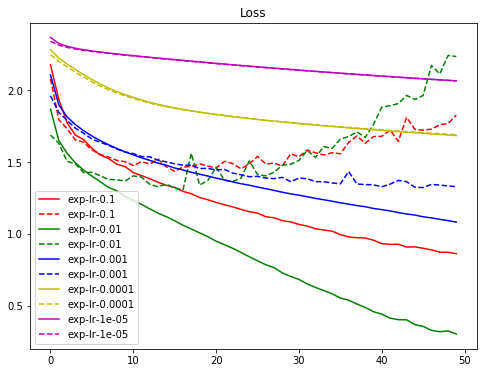

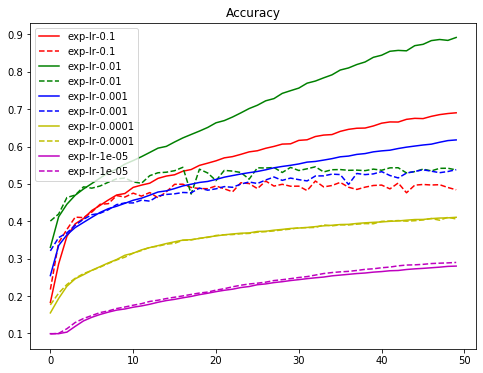

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()